In [1]:
import nltk

In [2]:
import re 
import pandas as pd
import numpy


In [3]:
from nltk.corpus import stopwords

In [7]:
from nltk.stem import PorterStemmer

In [8]:
from nltk.stem import WordNetLemmatizer

In [9]:
from wordcloud import WordCloud

In [10]:
import random

In [11]:
import matplotlib.pyplot as plt
import glob

In [12]:
from textblob import TextBlob

In [13]:
import io

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
url="https://raw.githubusercontent.com/Two-Students/Twitter-Analysis-Demonetization/master/demonetization-tweets.csv"
demo_df=pd.read_csv(url,encoding="cp1252")

In [16]:
demo_df.head()

,Unnamed: 0,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,801495656976318464,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,801495654778413057,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,801495544266821632,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,801495527024160768,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,801495445583360002,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


In [17]:
# tweets_df = input[['article']]
tweets_df=demo_df[["text"]]
tweets_df.columns =["tweet"]

In [18]:
tweets_df.head(100)

,tweet
0,RT @rssurjewala: Critical question: Was PayTM ...
1,RT @Hemant_80: Did you vote on #Demonetization...
2,"RT @roshankar: Former FinSec, RBI Dy Governor,..."
3,RT @ANI_news: Gurugram (Haryana): Post office ...
4,RT @satishacharya: Reddy Wedding! @mail_today ...
5,@DerekScissors1: India’s #demonetization: #Bla...
6,RT @gauravcsawant: Rs 40 lakh looted from a ba...
7,RT @Joydeep_911: Calling all Nationalists to j...
8,RT @sumitbhati2002: Many opposition leaders ar...
9,National reform now destroyed even the essence...


In [19]:
def remove_urls(input_text):
    tokens =input_text.split()
    clean_tokens=[word for word in tokens 
                 if 'http' not in word and 
                 "@" not in word and
                 "<" not in word and 
                 "RT" not in word]
    return " ".join(clean_tokens)
    

In [20]:
tweets_df["tweet"]=tweets_df["tweet"].apply(remove_urls)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
tweets_df.head(10)

,tweet
0,Critical question: Was PayTM informed about #D...
1,Did you vote on #Demonetization on Modi survey...
2,"Former FinSec, RBI Dy Governor, CBDT Chair + H..."
3,Gurugram (Haryana): Post office employees prov...
4,Reddy Wedding! cartoon #demonetization #ReddyW...
5,India’s #demonetization: #Blackmoney a symptom...
6,Rs 40 lakh looted from a bank in Kishtwar in J...
7,Calling all Nationalists to join... Walk for #...
8,Many opposition leaders are with on the #Demon...
9,National reform now destroyed even the essence...


In [22]:
def convert_case(input_text):
    return input_text.lower()

tweets_df["tweet"]=tweets_df['tweet'].apply(convert_case)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [23]:
tweets_df.head(10)

,tweet
0,critical question: was paytm informed about #d...
1,did you vote on #demonetization on modi survey...
2,"former finsec, rbi dy governor, cbdt chair + h..."
3,gurugram (haryana): post office employees prov...
4,reddy wedding! cartoon #demonetization #reddyw...
5,india’s #demonetization: #blackmoney a symptom...
6,rs 40 lakh looted from a bank in kishtwar in j...
7,calling all nationalists to join... walk for #...
8,many opposition leaders are with on the #demon...
9,national reform now destroyed even the essence...


In [24]:
def remove_special_chars(input_string):
    tokens = input_string.split()
    clean_tokens = [re.sub("[^a-z0-9]","",token) for token in tokens]
    return ' '.join(clean_tokens)

In [25]:
tweets_df["tweet"]=tweets_df["tweet"].apply(remove_special_chars)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
tweets_df.head(10)

,tweet
0,critical question was paytm informed about dem...
1,did you vote on demonetization on modi survey app
2,former finsec rbi dy governor cbdt chair harv...
3,gurugram haryana post office employees provide...
4,reddy wedding cartoon demonetization reddywedding
5,indias demonetization blackmoney a symptom not...
6,rs 40 lakh looted from a bank in kishtwar in j...
7,calling all nationalists to join walk for corr...
8,many opposition leaders are with on the demone...
9,national reform now destroyed even the essence...


In [27]:
def remove_stop_words(input_text):
    stopwords_list =set(stopwords.words('english'))
    tokens = input_text.split()
    stop_words_remove = [token for token in tokens 
                         if token not in stopwords_list]
    return ' '.join(stop_words_remove)

In [28]:
tweets_df["tweet"]=tweets_df["tweet"].apply(remove_stop_words)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\om
[nltk_data]     sai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
tweets_df.head(10)

,tweet
0,critical question paytm informed demonetizatio...
1,vote demonetization modi survey app
2,former finsec rbi dy governor cbdt chair harva...
3,gurugram haryana post office employees provide...
4,reddy wedding cartoon demonetization reddywedding
5,indias demonetization blackmoney symptom disea...
6,rs 40 lakh looted bank kishtwar jampk third in...
7,calling nationalists join walk corruptionfreei...
8,many opposition leaders demonetization respect...
9,national reform destroyed even essence sagan i...


In [31]:
def remove_small_words(input_string):
    tokens =input_string.split()
    clean_tokens = [token  for token in tokens if len (token) >= 3]
    return " ".join(clean_tokens)

In [32]:
tweets_df["tweet"]=tweets_df["tweet"].apply(remove_small_words)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
def remove_numerical_vals(input_string):
    return re.sub("[0-9]"," ",input_string)    

In [34]:
tweets_df["tweet"]=tweets_df["tweet"].apply(remove_numerical_vals)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
tweets_df.head(10)

,tweet
0,critical question paytm informed demonetizatio...
1,vote demonetization modi survey app
2,former finsec rbi governor cbdt chair harvard ...
3,gurugram haryana post office employees provide...
4,reddy wedding cartoon demonetization reddywedding
5,indias demonetization blackmoney symptom disea...
6,lakh looted bank kishtwar jampk third incident...
7,calling nationalists join walk corruptionfreei...
8,many opposition leaders demonetization respect...
9,national reform destroyed even essence sagan i...


In [36]:
freq = pd.Series(" ".join(tweets_df['tweet']
                         ).split()).value_counts()[:10]

In [37]:
comman_words_list =list(freq.index)

In [38]:
comman_words_list

['demonetization',
 'amp',
 'people',
 'modi',
 'lakh',
 'bank',
 'support',
 'since',
 'terrorists',
 'nation']

In [39]:
rare_fequence = pd.Series(" ".join(tweets_df['tweet']
                         ).split()).value_counts()[-2000:]

In [40]:
rare_words_list =list(rare_fequence.index)

In [41]:
rare_words_list

['scoundrel',
 'serpentine',
 'bump',
 'sensex',
 'collected',
 'hoax',
 'onthespot',
 'exports',
 'sacrificesonehastomake',
 'builders',
 'kuber',
 'demonetizationas',
 'dnarumourbuster',
 'modisarkar',
 'racket',
 'acchhe',
 'patriotic',
 'randeep',
 'dalal',
 'diemay',
 'cashlessindia',
 'incase',
 'ashwinderraj',
 'demonize',
 'concept',
 'hardships',
 'stages',
 'anybo',
 'reaches',
 'masseswait',
 'mutilation',
 'pahlajnihalani',
 'distributing',
 'deadlock',
 'southern',
 'possess',
 'nagababu',
 'relationship',
 'bbcjustinr',
 'signs',
 'sec',
 'perishability',
 'observing',
 'cabs',
 'cod',
 'allergy',
 'congratulations',
 'hopping',
 'raghuram',
 'yday',
 'missionblamemodi',
 'secretaryeconomic',
 'notemark',
 'badlyfarmers',
 'tweetingdharnasstrikes',
 'noisesunited',
 'pushing',
 'alumna',
 'fault',
 'oneupmanship',
 'pigeons',
 'crazy',
 'demonetisationdisaster',
 'dep',
 'uncha',
 'waiver',
 'wrongs',
 'decipher',
 'wards',
 'brothers',
 'ghulamnabiazad',
 'lab',
 'appbas

In [42]:
def remove_common_words(input_text):
    tokens = input_text.split()
    common_words_removed = [token  for token in tokens
                           if token not in comman_words_list]
    return ' '.join(common_words_removed)

In [43]:
def remove_rare_words(input_text):
    tokens = input_text.split()
    rare_words_removed= [token for token in tokens
                           if token not in rare_words_list]
    return ' '.join(rare_words_removed)

In [44]:
#tweets_df["tweet"]=tweets_df["tweet"].apply(remove_common_words)
#tweets_df["tweet"]=tweets_df["tweet"].apply(remove_rare_words)

In [45]:
tweets_df.head()

,tweet
0,critical question paytm informed demonetizatio...
1,vote demonetization modi survey app
2,former finsec rbi governor cbdt chair harvard ...
3,gurugram haryana post office employees provide...
4,reddy wedding cartoon demonetization reddywedding


In [46]:
freq = pd.Series(" ".join(tweets_df['tweet']
                         ).split()).value_counts()[:]

In [47]:
freq

demonetization    7880
amp                930
people             773
modi               746
lakh               689
bank               662
support            642
since              580
terrorists         578
nation             573
thats              558
jampk              553
kishtwar           544
looted             544
third              542
incident           542
move               525
question           424
supports           391
goes               371
oscar              353
app                346
paytm              339
india              333
back               318
full               303
critical           296
clearly            290
informed           290
edict              289
                  ... 
sadakchap            1
jale                 1
trillion             1
fron                 1
gonna                1
uturns               1
anus                 1
monitor              1
gold                 1
iec                  1
sleep                1
ysrcongress          1
dictatorial

In [48]:
# Stemming 
stemmer= PorterStemmer()
def stemming(input_text):
    tokens=input_text.split()
    stemmed=[stemmer.stem(token)for token in tokens]
    return" ".join(stemmed)


In [110]:
tweets_df["Stemmed"]=tweets_df["tweet"].apply(stemming)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [112]:
tweets_df['Stemmed'].head()

0    critic question paytm inform demonet edict cle...
1                         vote demonet modi survey app
2    former finsec rbi governor cbdt chair harvard ...
3    gurugram haryana post offic employe provid cas...
4                   reddi wed cartoon demonet reddywed
Name: Stemmed, dtype: object

In [119]:
lemmatizer = WordNetLemmatizer()
def lemmatize(input_text):
    tokens= input_text.split()
    lemmas=[lemmatizer.lemmatize(token) for token in tokens]
    return" ".join(lemmas)
tweets_df['lemmas']=tweets_df["tweet"].apply(lemmatize)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [120]:
tweets_df['lemmas'].head()

0    critical question paytm informed demonetizatio...
1                  vote demonetization modi survey app
2    former finsec rbi governor cbdt chair harvard ...
3    gurugram haryana post office employee provide ...
4    reddy wedding cartoon demonetization reddywedding
Name: lemmas, dtype: object

In [123]:
def get_sentiment(input_text):
    blob=TextBlob(input_text)
    sentiment = blob.sentiment.polarity
    return sentiment
tweets_df['sentiment']=tweets_df['lemmas'].apply(get_sentiment)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [125]:
negative_counts =tweets_df[tweets_df['sentiment'] < 0].count()[0]
neutral_counts =tweets_df[tweets_df['sentiment'] == 0].count()[0]
positive_counts =tweets_df[tweets_df['sentiment'] > 0].count()[0]

In [126]:
tweets_df['sentiment'].head()

0    0.15
1    0.00
2    0.00
3    0.00
4    0.00
Name: sentiment, dtype: float64

In [127]:
negative_counts

1291

In [128]:
neutral_counts

4354

In [129]:
positive_counts

2355

In [130]:
y_pos =[0,1,2]
counts =[positive_counts,neutral_counts,negative_counts]

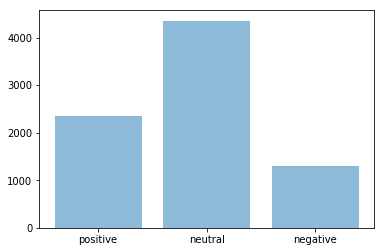

In [135]:
plt.bar(y_pos,counts,align='center',alpha=0.5)
plt.xticks(y_pos,["positive","neutral","negative"])
plt.show()

In [136]:
negative_df=tweets_df[tweets_df['sentiment'] < 0]

In [159]:

vectorizer = CountVectorizer(ngram_range=(2,3),
                                  max_features=100,
                                  min_df=0.01,
                                  max_df=0.95)

vectorizer = TfidfVectorizer(ngram_range=(2,2),
                            max_features=100,
                            min_df=0.01,
                            max_df=0.85)


In [160]:
tdm=vectorizer.fit_transform(negative_df["lemmas"])


In [161]:
tdm

<1291x100 sparse matrix of type '<class 'numpy.float64'>'
	with 3888 stored elements in Compressed Sparse Row format>

In [162]:
vectorizer.get_feature_names()

['amp cursing',
 'amp even',
 'amp mamata',
 'atm useless',
 'bank ques',
 'banking license',
 'beginning government',
 'black money',
 'bulletin severe',
 'continues dire',
 'crisis continues',
 'crore day',
 'cursing thug',
 'day due',
 'deep continuous',
 'delhities standing',
 'demonetization amp',
 'demonetization bulletin',
 'demonetization debate',
 'demonetization drama',
 'demonetization high',
 'demonetization move',
 'demonetization paan',
 'demonetization people',
 'demonetization poor',
 'demonetization tragic',
 'demonetization usual',
 'dire shortage',
 'due demonetization',
 'even rich',
 'even youre',
 'everyone seems',
 'fake note',
 'flouting rbi',
 'folk reason',
 'get fake',
 'get windfall',
 'given lot',
 'government deep',
 'govt flouting',
 'hate rich',
 'hate richer',
 'hate richest',
 'high value',
 'implementation modi',
 'india demonetization',
 'india get',
 'indian still',
 'lakh crore',
 'license oper',
 'like pappu',
 'liquidity crisis',
 'long bank',
 '

In [173]:
top_n = 200
indices = vectorizer.idf_.argsort()[::-1]
feature= vectorizer.get_feature_names()
top_features=[(feature[i],vectorizer.idf_[i],i)
             for i in indices[:top_n]]

d= {}
for i in top_features:
    d[i[0]]=i[1]
    
w= WordCloud(background_color="white",
            max_words=200,
            max_font_size=200,height=2000,width=2000,colormap='rainbow').fit_words(d)

In [174]:
w.to_file('namo.png')